# Preprocessing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import csv
%matplotlib inline

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.linear_model import Ridge

np.random.seed(42)


## Load in training data

In [2]:
# load train.csv as `df` setting `Id` to the index
df = pd.read_csv('../datasets/train.csv', index_col='Id')

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Lowercase Columns and Replace Spaces with Underscores

In [4]:
df.columns = map(str.lower, df.columns)

In [5]:
df.columns = df.columns.str.replace(' ', '_')

In [6]:
df.rename(columns = {'saleprice':'sale_price'}, inplace=True)

In [7]:
df.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

## Check for Null Values & Missing Values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         2051 non-null object
roof_matl          2

## Create a Dictionary for Null Values and Empty Values

In [9]:
na_dict = {'alley':'None',
'fireplace_qu':'None',
'garage_cond':'None',
'pool_qc':'None',
'fence':'None',
'misc_feature':'None',
'lot_frontage':lambda x: .01*x['lot_area'],
'mas_vnr_type':'None',
'mas_vnr_area':0,
'bsmt_qual':'None',
'bsmt_cond':'None',
'bsmt_exposure':'None',
'bsmtfin_type_1':'None',
'bsmtfin_sf_1':0,
'bsmtfin_type_2':'None',
'bsmtfin_sf_2':0,
'bsmt_unf_sf':0,
'total_bsmt_sf':0,
'bsmt_full_bath':'None',
'bsmt_half_bath':'None',
'garage_type':'None',
'garage_finish':'None',
'garage_qual':'None',
'garage_cars':0,
'garage_area':0}

## Fill Null Values with Our Dictionary

In [10]:
df.fillna(na_dict, inplace=True)

In [11]:
df.drop(['garage_yr_blt'], axis=1, inplace=True) #### We drop the column garage_yr_blt because we don't think it has a large impact on sale price.

In [12]:
# drop 'PID'
df.drop('pid', axis=1, inplace=True)

## Confirm that we've filled all Nulls

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 78 columns):
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       2051 non-null object
lot_area           2051 non-null int64
street             2051 non-null object
alley              2051 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         2051 non-null object
roof_matl          2051 non-null object
exterior_1st       

Note: Lot Frontage: many values appear to be around 1% of the lot area so I use that calculation to fill in the missing values. Otherwise I can use 0.

## Save Clean data to Datasets

In [14]:
df.to_csv('../datasets/aimes_clean_data')

## Plots

I'm curious about the relationship between sale price and a few variables of interest:

Text(0.5, 1.0, 'Sale Price by Year Built')

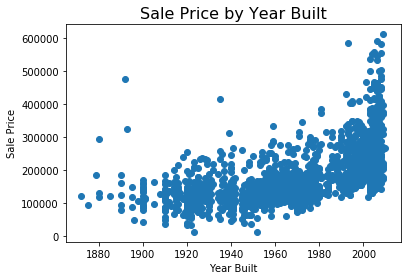

In [29]:
plt.scatter(df['year_built'], df['sale_price'])
plt.xlabel('Year Built') 
plt.ylabel('Sale Price')
plt.title('Sale Price by Year Built', size=16)

There is some linear relationship between Year Built and Sale Price with a few outliers from the 1900s.

Text(0.5, 1.0, 'Sale Price by Lot Area')

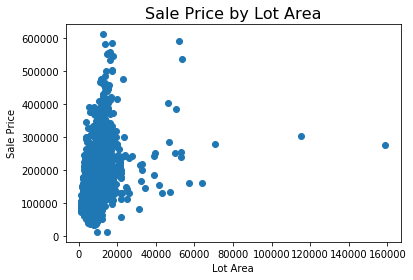

In [30]:
plt.scatter(df['lot_area'], df['sale_price'])
plt.xlabel('Lot Area') 
plt.ylabel('Sale Price')
plt.title('Sale Price by Lot Area', size=16)

There is not a strong linear relationship between Lot Area and Sale Price. Let's investigate with a Correlation Heatmap.

### Correlation: Overall_Quality

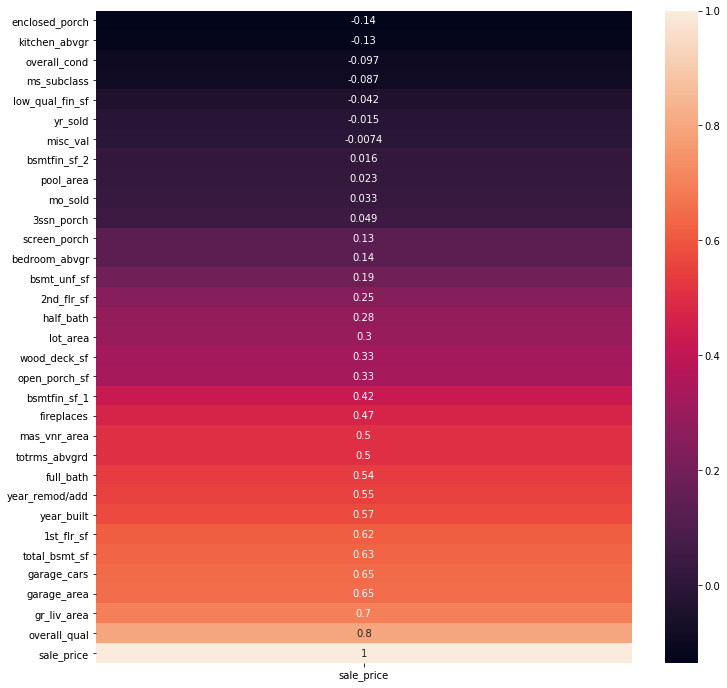

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr()[['sale_price']].sort_values('sale_price'), annot=True)

There is a strong correlation between overall_qual and price as well as garage_area and price and 1st Floor Square Feet. I'd like to investigate these further.

There is a 50% correlation between Year Built and Sale Price (with homes built after 1980 starting to trend upward in sale price.